### Data Reading and Stroing into pandas DataFrame 

In [21]:
# PIL short for pillow library is imaging library which allow us to create image form vector of pixal values either in grayscale or in RGB
from PIL import Image
import numpy as np
import pandas as pd
from keras.models import model_from_json

In [2]:
train_data = pd.read_csv('emnist-balanced-train.csv',header=None,names=list(range(0,(28*28)+1)))
test_data = pd.read_csv('emnist-balanced-test.csv',header=None,names=list(range(0,(28*28)+1)))

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mapping = [0]*47
f_ = open("emnist-balanced-mapping.txt",'r')
for line in f_:
    a,b=line.split()
    mapping[int(a)]=chr(int(b))

In [5]:
ytrain = train_data[0]

In [6]:
xtrain = train_data.drop([0],axis=1)

In [7]:
ytest = test_data[0]

In [8]:
xtest = test_data.drop([0],axis=1)

In [9]:
xtest.shape,xtrain.shape

((18800, 784), (112800, 784))

In [10]:
xtrain.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sample Image from our Data

In [11]:
idx = 6
im = Image.fromarray(((xtrain.loc[idx].values.reshape(28,28))).astype('uint8').T)
mapping[ytrain[idx]]

'Q'

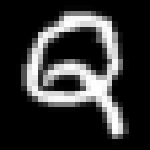

In [12]:
im.resize((150,150))

### Model Training

In [13]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model,Sequential
from keras.utils import np_utils
num_classes = 47
ytrain_one_hot = np_utils.to_categorical(ytrain, num_classes)
ytest_one_hot = np_utils.to_categorical(ytest, num_classes)
print ("ytrain:", ytrain_one_hot.shape)
print ("ytest:", ytest_one_hot.shape)

Using TensorFlow backend.


ytrain: (112800, 47)
ytest: (18800, 47)


In [14]:
# Normalizing data into scale of 0-1
xtrain/=255
xtest/=255

In [15]:
model = Sequential()
model.add(Dense(784, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [16]:
ytrain_one_hot[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [17]:

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(xtrain.values, ytrain_one_hot, # Train the model using the training set...
          batch_size=512, epochs=10,
          verbose=2, validation_split=0.1) # ...holding out 10% of the data for validation

Train on 101520 samples, validate on 11280 samples
Epoch 1/10
30s - loss: 1.0849 - acc: 0.6865 - val_loss: 0.6527 - val_acc: 0.7905
Epoch 2/10
32s - loss: 0.5793 - acc: 0.8120 - val_loss: 0.5268 - val_acc: 0.8263
Epoch 3/10
31s - loss: 0.4624 - acc: 0.8441 - val_loss: 0.4783 - val_acc: 0.8382
Epoch 4/10
31s - loss: 0.3973 - acc: 0.8623 - val_loss: 0.4687 - val_acc: 0.8380
Epoch 5/10
31s - loss: 0.3514 - acc: 0.8748 - val_loss: 0.4560 - val_acc: 0.8427
Epoch 6/10
32s - loss: 0.3146 - acc: 0.8852 - val_loss: 0.4525 - val_acc: 0.8440
Epoch 7/10
31s - loss: 0.2875 - acc: 0.8939 - val_loss: 0.4471 - val_acc: 0.8426
Epoch 8/10
32s - loss: 0.2605 - acc: 0.9024 - val_loss: 0.4435 - val_acc: 0.8477
Epoch 9/10
33s - loss: 0.2407 - acc: 0.9080 - val_loss: 0.4494 - val_acc: 0.8503
Epoch 10/10
31s - loss: 0.2199 - acc: 0.9157 - val_loss: 0.4589 - val_acc: 0.8493


### Saving Model

In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [19]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [28]:
loaded_model.get_weights()

[array([[ 0.00665633, -0.1246977 , -0.01244546, ..., -0.06302496,
         -0.01807048, -0.01204217],
        [ 0.06278656, -0.07354856, -0.04588665, ...,  0.07691882,
          0.04339374,  0.01955363],
        [ 0.0654152 , -0.03883999, -0.00950611, ..., -0.01039005,
         -0.01985106,  0.02104146],
        ..., 
        [-0.00192827, -0.00629572, -0.03107245, ...,  0.09406602,
         -0.00274892,  0.03769166],
        [ 0.05312697, -0.0250899 , -0.0961483 , ..., -0.05624101,
         -0.0180363 ,  0.08697018],
        [ 0.00428581,  0.00204986,  0.00064777, ...,  0.00346544,
          0.00515051, -0.00435385]], dtype=float32),
 array([  8.04912765e-03,  -2.67244130e-02,  -1.44839864e-02,
          1.61936227e-02,  -1.26630999e-02,   2.78623644e-02,
          1.31722717e-02,  -6.82029268e-03,   2.04818305e-02,
          6.36105798e-03,  -3.74803320e-02,   1.94860790e-02,
          2.62156297e-02,   3.75085771e-02,   7.82445539e-03,
         -2.57295575e-02,  -3.68237197e-02,  -4

### Testing model

In [29]:
op = model.predict(xtest.values)
op_char = [mapping[np.array(op[i]).argmax(axis=0)] for i in range(len(op))]
ytest_char = [mapping[i] for i in ytest]
from sklearn.metrics import accuracy_score
print("accuracy on test dataset : ",accuracy_score(ytest_char,op_char)*100,"%")

accuracy on test dataset :  85.3085106383 %


In [30]:
op = loaded_model.predict(xtest.values)
op_char = [mapping[np.array(op[i]).argmax(axis=0)] for i in range(len(op))]
ytest_char = [mapping[i] for i in ytest]
from sklearn.metrics import accuracy_score
print("accuracy on test dataset : ",accuracy_score(ytest_char,op_char)*100,"%")

accuracy on test dataset :  85.3085106383 %


In [93]:
xtest.values

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
#saving our ouput array and actual array to a file named result
file_ = open('result.txt','w')
file_.write("Actual Values :--> \n")
file_.write("[")
for i in ytest_char:
    file_.write(i+", ")
file_.write("]\n")
file_.write("Predicted Values : \n")
file_.write("[")
for i in op_char:
    file_.write(i+", ")
file_.write("]\n")
file_.write("Accuracy : "+str(accuracy_score(ytest_char,op_char)*100)+"%")
file_.close()

### Testing On custom Image input

In [104]:
xtrain.shape

(112800, 784)

In [181]:
import os
name_ = os.listdir("testing")
print("testing for this imag :",name_)
test_im = Image.open("testing/"+name_[0])
test_im_arr = np.array(test_im)
test_im_arr = np.transpose(test_im_arr)
temp_im_ = Image.fromarray(test_im_arr)
test_im_arr = test_im_arr.astype('float')/255.0
test_im_arr = test_im_arr.reshape((28*28))
test_im_arr = np.atleast_2d(test_im_arr)
#mapping[np.array(model.predict([test_im_arr])[0]).argmax(axis=0)]
opp = model.predict(test_im_arr)
print(np.array(opp[0]).argmax(axis=0))
mapping[np.array(opp[0]).argmax(axis=0)]

testing for this imag : ['J_13.png', 'Thumbs.db']
19


'J'

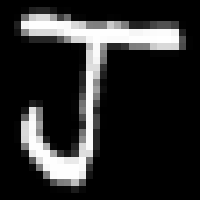

In [185]:
temp__ =Image.fromarray((test_im_arr.reshape((28,28))*255).astype('uint8').T)
temp__.resize((200,200))

### Confusion Matrix

In [144]:
len(ytest_char),len(op_char)

(18800, 18800)

In [145]:
# Saving Result To html file table for better representation
pd.crosstab([ytest_char],[op_char],rownames=['True'],colnames=['predicted'],margins=True).to_html("Confusion Matrix.html")